In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
survey_results_df = pd.read_csv("survey_results_public.csv")
survey_results_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [3]:
survey_results_df.shape

(64461, 61)

In [4]:
survey_results_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [5]:
survey_schema_df = pd.read_csv("survey_results_schema.csv",index_col = "Column").QuestionText
survey_schema_df

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [6]:
survey_schema_df.Respondent

'Randomized respondent ID number (not in order of survey response time)'

#Data_Preprocessing

In [8]:
selected_columns = [
    #Demographics
    'Country', 
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    #Programming Experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    #Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [9]:
survey_df = survey_results_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
schema = survey_schema_df[selected_columns]
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [11]:
survey_df.shape

(64461, 20)

In [12]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [13]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df['Age1stCode'], errors = 'coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'], errors = 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df['YearsCodePro'], errors = 'coerce')

In [14]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57473 non-null  float64
 7   YearsCode               56784 non-null  float64
 8   YearsCodePro            44133 non-null  float64
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [15]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [16]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

In [17]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45319.000000,57326.000000,56636.000000,43993.000000,41002.000000
mean,30.832322,15.475317,12.783883,8.873003,40.024395
std,9.505965,5.114952,9.494519,7.762089,10.630010
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


In [18]:
survey_df["Gender"].value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

In [19]:
survey_df = survey_df[~survey_df["Gender"].str.contains(";", na=False)]

In [20]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45068.000000,57027.000000,56339.000000,43794.000000,40813.000000
mean,30.842926,15.485068,12.791583,8.882176,40.026995
std,9.501008,5.113927,9.498470,7.768074,10.626085
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


In [21]:
survey_df['Gender'].value_counts()

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

In [22]:
#Data Analysis and visualization

In [23]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [24]:
schema.Country

'Where do you live?'

In [25]:
survey_df.Country.nunique()

183

In [26]:
response_countries = survey_df.Country.value_counts()
top_15_countries = response_countries.head(15)
top_15_countries

Country
United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: count, dtype: int64

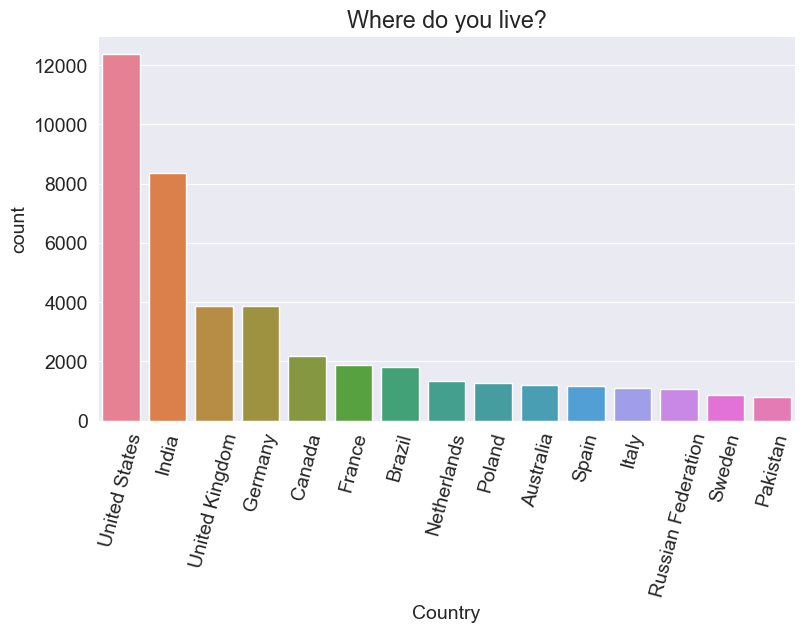

In [27]:
plt.title(schema.Country)
plt.xticks(rotation = 75)
sns.barplot(x = top_15_countries.index, y = top_15_countries, hue = top_15_countries.index)
plt.show()

In [28]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

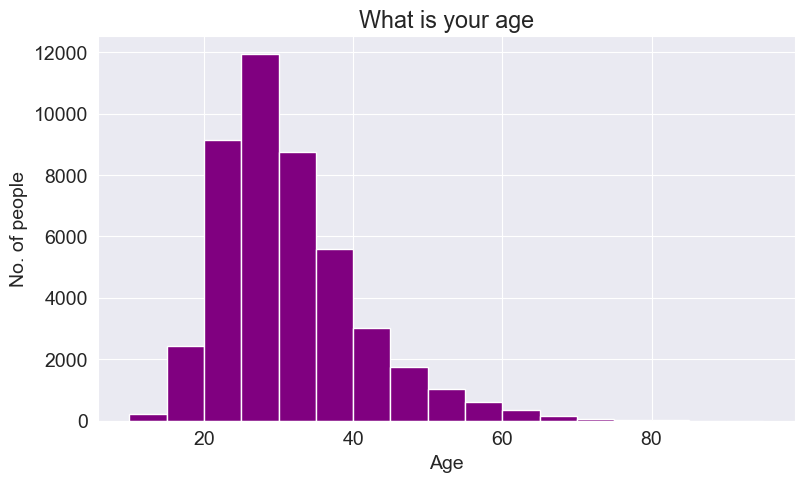

In [29]:
plt.title("What is your age")
plt.xlabel("Age")
plt.ylabel("No. of people")
plt.hist(survey_df.Age, bins = np.arange(10, 100, 5), color = "purple")
plt.show()

In [30]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [31]:
gender_values = survey_df.Gender.value_counts(dropna = False)
gender_values

Gender
Man                                                  45895
NaN                                                  13880
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

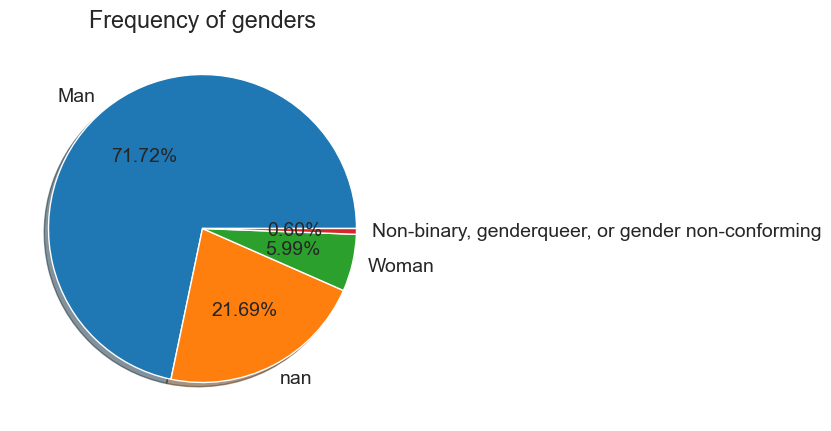

In [32]:
plt.title("Frequency of genders")
plt.pie(gender_values, labels = gender_values.index, autopct = "%0.2f%%", shadow = True)
plt.show()

In [33]:
schema.index.unique()

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt'],
      dtype='object', name='Column')

In [34]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [35]:
education_count = survey_df.EdLevel.value_counts()
education_count

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26356
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13024
Some college/university study without earning a degree                                 7163
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4724
Associate degree (A.A., A.S., etc.)                                                    1831
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1681
Primary/elementary school                                                               929
Professional degree (JD, MD, etc.)                                                      793
I never completed any formal education                                                  480
Name: count, dtype: int64

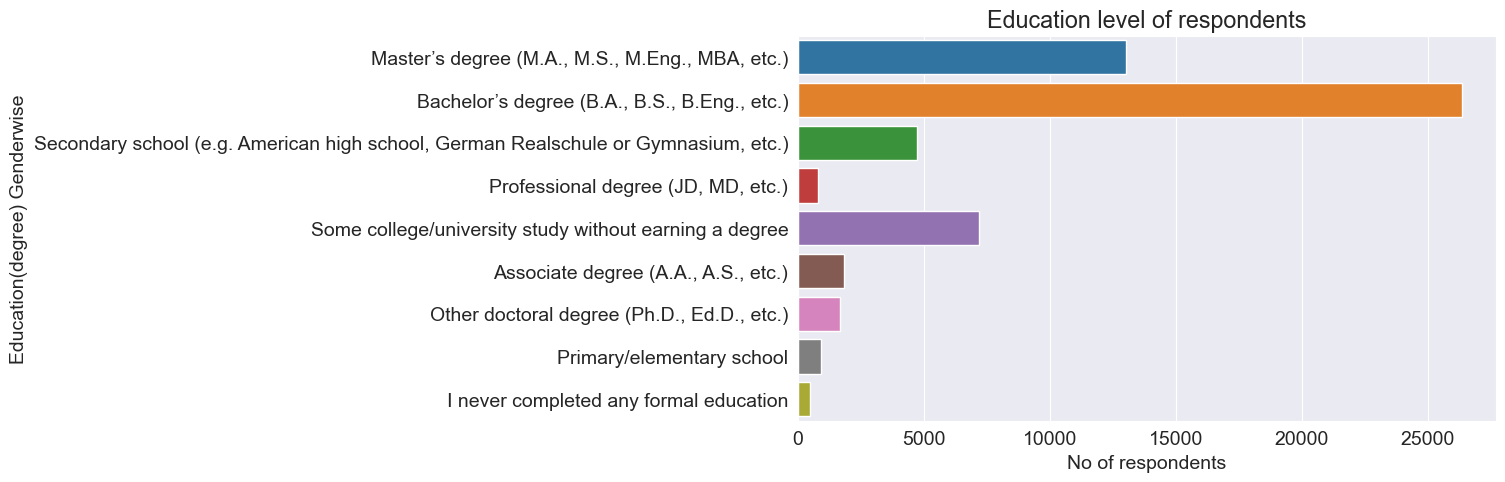

In [36]:
plt.title("Education level of respondents")
plt.xlabel("No of respondents")
plt.ylabel("Education(degree) Genderwise")
sns.countplot(y = survey_df.EdLevel, hue = survey_df.EdLevel).legend().remove()
plt.show()

In [37]:
schema.index

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt'],
      dtype='object', name='Column')

In [38]:
schema.UndergradMajor

'What was your primary field of study?'

In [39]:
undergrad_major = survey_df.UndergradMajor.value_counts()

In [40]:
undergrad_major_pct = (undergrad_major.values / undergrad_major.sum()) * 100
undergrad_major_pct

array([61.93919279,  9.35419507,  7.98316838,  4.31656098,  3.62709654,
        3.50263735,  2.70056698,  1.96961615,  1.82145044,  1.41251309,
        0.88504317,  0.48795907])

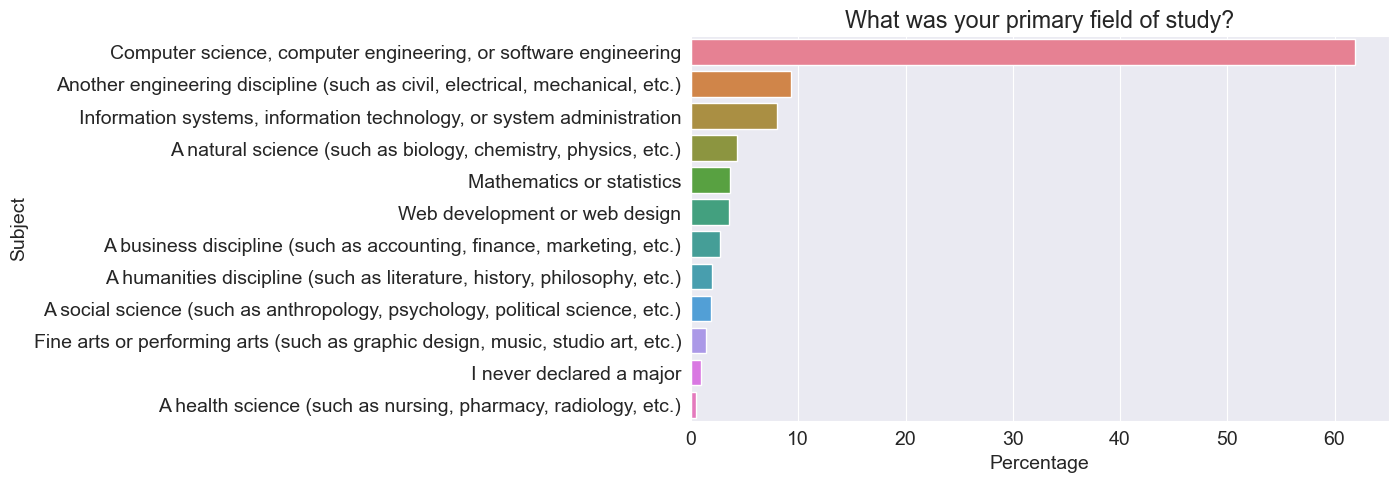

In [41]:
plt.title(schema.UndergradMajor)
plt.xlabel("Percentage")
plt.ylabel("Subject")
sns.barplot(y = undergrad_major.index, x = undergrad_major_pct, hue = undergrad_major.index)
plt.show()

In [42]:
schema.Employment

'Which of the following best describes your current employment status?'

In [43]:
employment_status = survey_df.Employment.value_counts(normalize = True, ascending = False) * 100
employment_status

Employment
Employed full-time                                      70.918383
Student                                                 12.199893
Independent contractor, freelancer, or self-employed     8.863615
Not employed, but looking for work                       3.665962
Employed part-time                                       3.470360
Not employed, and not looking for work                   0.501625
Retired                                                  0.380162
Name: proportion, dtype: float64

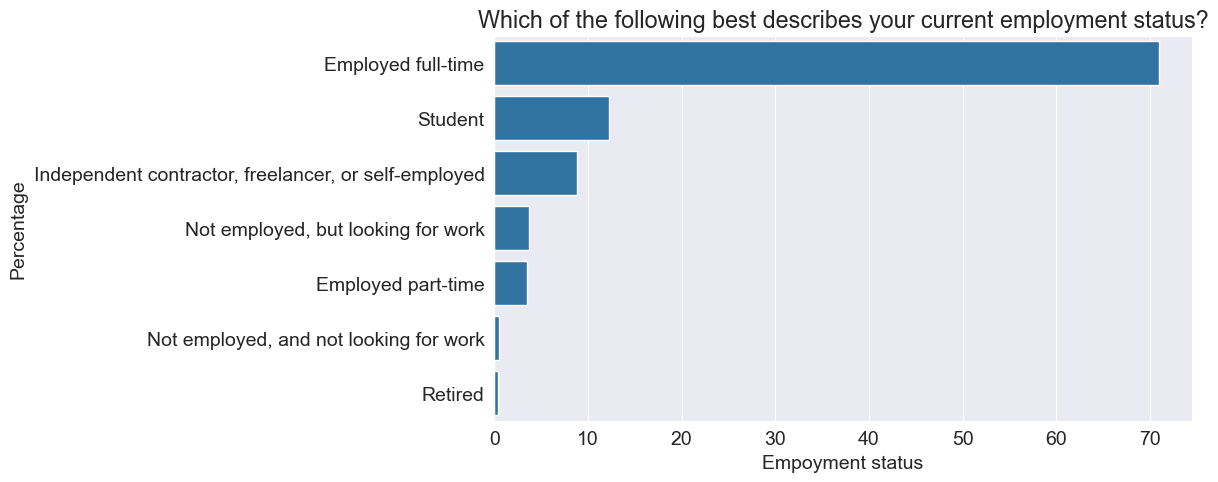

In [44]:
plt.title(schema.Employment)
plt.xlabel("Empoyment status")
plt.ylabel("Percentage")
sns.barplot(y = employment_status.index, x = employment_status)
plt.show()

In [45]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [46]:
survey_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                       

In [47]:
def count_individual_values(df, column, delimiter=";"):
    """
    Counts individual occurrences of each unique value in a multivalued column.

    :param df: Input DataFrame
    :param column: Column name containing multivalued data
    :param delimiter: Delimiter used to separate values in the column
    :return: Pandas Series with unique value counts
    """
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")

    # Drop NaN values (if any)
    df = df.dropna(subset=[column])

    # Ensure column is of string type before splitting
    df[column] = df[column].astype(str)

    # Split values and explode them into separate rows
    exploded_values = df[column].str.split(delimiter).explode()

    # Count occurrences of each unique value
    value_counts = exploded_values.value_counts()

    return value_counts

In [48]:
schema.index

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt'],
      dtype='object', name='Column')

In [49]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [50]:
schema.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [51]:
survey_df.LanguageWorkedWith.value_counts()

LanguageWorkedWith
HTML/CSS;JavaScript;PHP;SQL                                                         1065
HTML/CSS;JavaScript                                                                  895
C#;HTML/CSS;JavaScript;SQL                                                           849
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                744
HTML/CSS;JavaScript;TypeScript                                                       693
                                                                                    ... 
C;C#;C++;HTML/CSS;Objective-C;SQL;Swift                                                1
C++;Dart;HTML/CSS;JavaScript;TypeScript                                                1
Bash/Shell/PowerShell;Go;Java;JavaScript;SQL                                           1
C;C#;HTML/CSS;PHP;Python;SQL                                                           1
Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;JavaScript;Objective-C;Python;Swift       1
Na

In [63]:
lang_worked_count = count_individual_values(survey_df, "LanguageWorkedWith", delimiter=";")
lang_worked_count_pct = (lang_worked_count.values / lang_worked_count.values.sum()) * 100

C:\Users\HASHIR\AppData\Local\Temp\ipykernel_2616\3259813127.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(str)


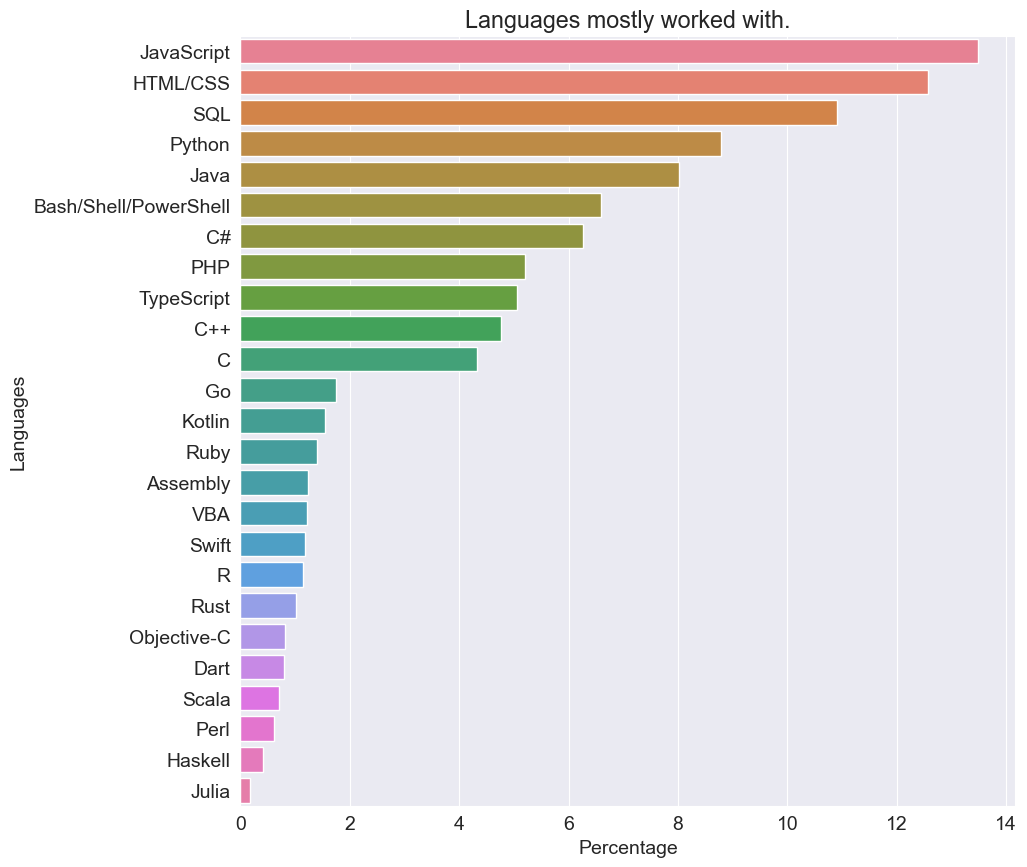

In [73]:
plt.figure(figsize = (10, 10))
plt.title("Languages mostly worked with.")
plt.xlabel("Percentage")
plt.ylabel("Languages")
sns.barplot(y = lang_worked_count.index, x = lang_worked_count_pct, hue = lang_worked_count.index)
plt.show()

In [75]:
lang_desired_count = count_individual_values(survey_df, "LanguageDesireNextYear", delimiter=";")
lang_desired_count_pct = (lang_desired_count.values / lang_desired_count.values.sum()) * 100

C:\Users\HASHIR\AppData\Local\Temp\ipykernel_2616\3259813127.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(str)


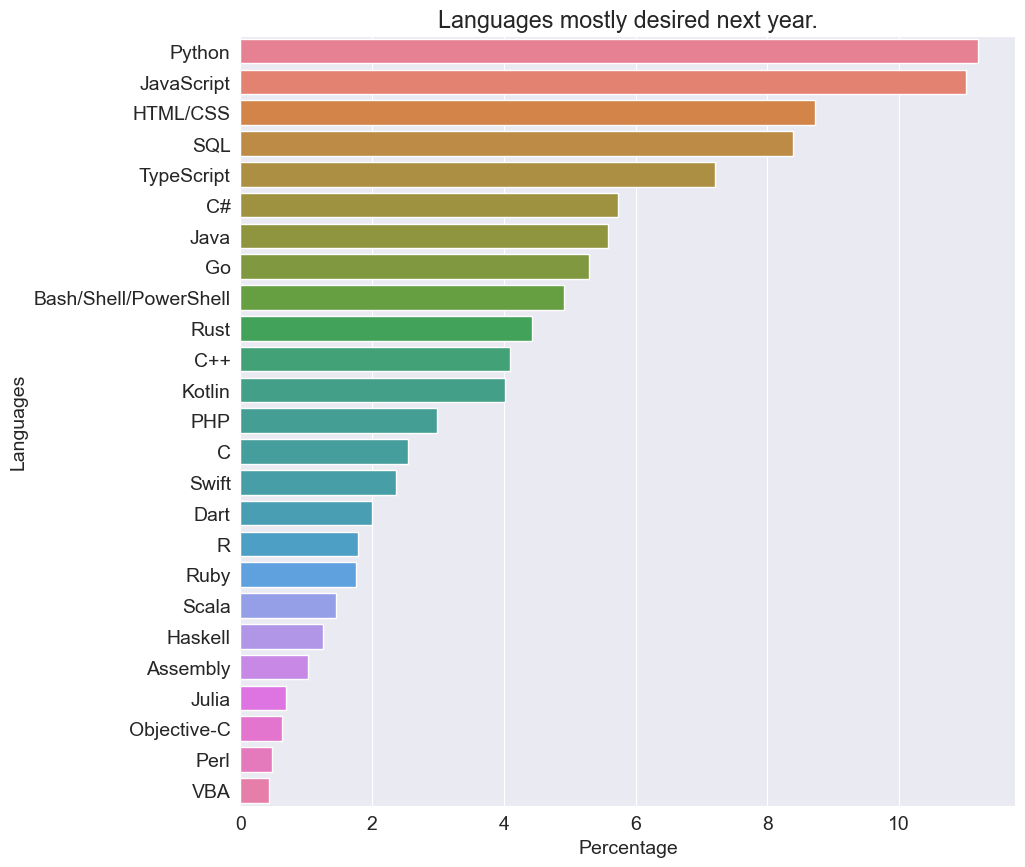

In [77]:
plt.figure(figsize = (10, 10))
plt.title("Languages mostly desired next year.")
plt.xlabel("Percentage")
plt.ylabel("Languages")
sns.barplot(y = lang_desired_count.index, x = lang_desired_count_pct, hue = lang_desired_count.index)
plt.show()

In [83]:
def split_multicolumn(col_series, delimiter=";"):
    """
    Converts a multivalued column into multiple boolean columns (one-hot encoding).
    
    :param col_series: Pandas Series containing multivalued strings.
    :param delimiter: The delimiter separating multiple values in a single cell (default ";").
    :return: DataFrame with one-hot encoded columns.
    """
    if not isinstance(col_series, pd.Series):
        raise ValueError("Input must be a Pandas Series.")

    # Drop NaN values and split into lists
    exploded = col_series.dropna().str.split(delimiter)

    # Get all unique options
    unique_options = sorted(set(option for sublist in exploded for option in sublist))

    # Create DataFrame with one-hot encoding
    result_df = pd.DataFrame({option: col_series.apply(lambda x: option in str(x).split(delimiter)) for option in unique_options})

    return result_df

In [87]:
worked_lang = split_multicolumn(survey_df.LanguageWorkedWith)
worked_lang

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [91]:
desired_lang = split_multicolumn(survey_df.LanguageDesireNextYear)
desired_lang

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [131]:
loved_langs = worked_lang & desired_lang  # Logical AND operation (True where both are True)
loved_langs = loved_langs.sum().sort_values(ascending=False)  # Sum and sort
loved_langs_pct = (loved_langs / worked_lang.sum()) * 100  # Percentage calculation
print(loved_langs_pct)

Assembly                 29.089352
Bash/Shell/PowerShell    53.688241
C                        32.983023
C#                       59.623021
C++                      43.415820
Dart                     62.068966
Go                       62.176789
HTML/CSS                 53.494594
Haskell                  51.378446
Java                     44.108273
JavaScript               58.353888
Julia                    61.431412
Kotlin                   62.813276
Objective-C              23.133362
PHP                      37.232755
Perl                     28.369994
Python                   66.598884
R                        44.427387
Ruby                     42.735896
Rust                     86.069824
SQL                      56.607710
Scala                    53.257651
Swift                    59.476346
TypeScript               67.114373
VBA                      19.458057
dtype: float64


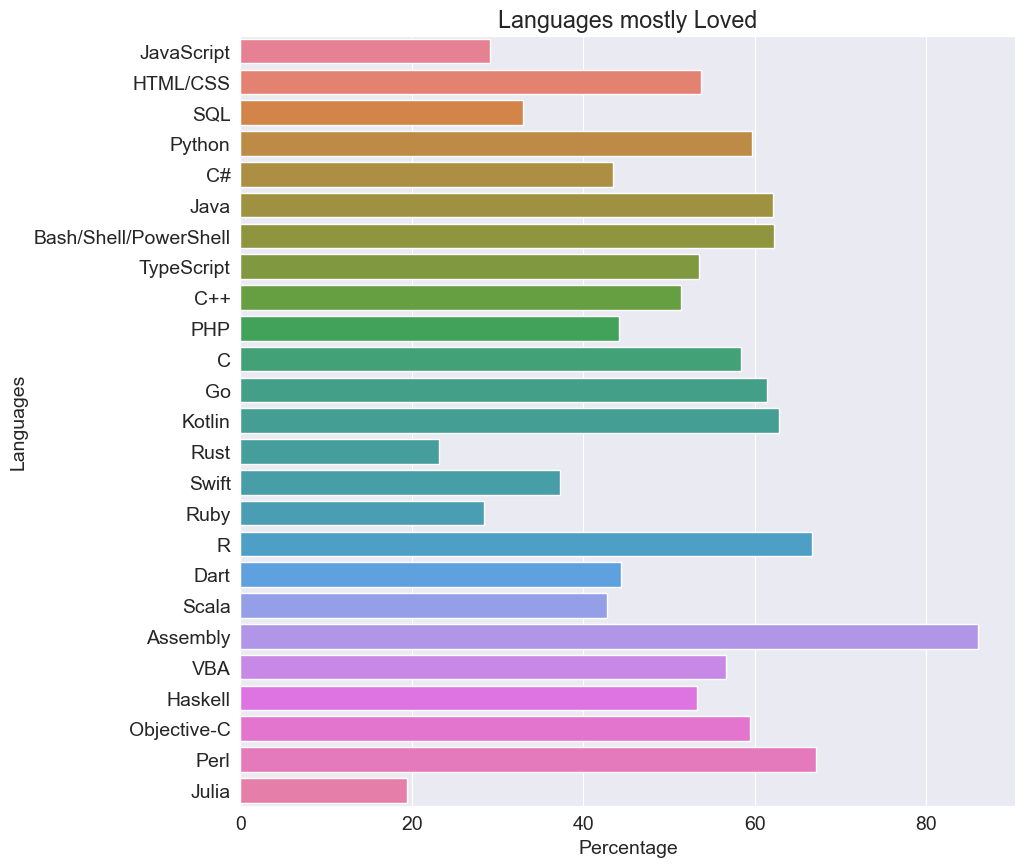

In [133]:
plt.figure(figsize = (10, 10))
plt.title("Languages mostly Loved")
plt.xlabel("Percentage")
plt.ylabel("Languages")
sns.barplot(y = loved_langs.index, x = loved_langs_pct, hue = loved_langs.index)
plt.show()